# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"
units="metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
                                

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bargarh
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | vernon
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | mangrol
Processing Record 7 of Set 1 | chui
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | husainabad
Processing Record 12 of Set 1 | lorengau
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | kyaikkami
Processing Record 15 of Set 1 | lerwick
Processing Record 16 of Set 1 | petropavlovsk-kamchatsky
Processing Record 17 of Set 1 | aasiaat
Processing Record 18 of Set 1 | wotho
Processing Record 19 of Set 1 | nizhneangarsk
Processing Record 20 of Set 1 | jiwani
Processing Record 21 of Set 1 | mariental
Processing Record 22 of Set 1 | adamstown
Processi

Processing Record 39 of Set 4 | nova xavantina
Processing Record 40 of Set 4 | figuig (centre)
Processing Record 41 of Set 4 | energetik
Processing Record 42 of Set 4 | mil'kovo
Processing Record 43 of Set 4 | geraldton
Processing Record 44 of Set 4 | ust-nera
Processing Record 45 of Set 4 | ishikawa
Processing Record 46 of Set 4 | chonchi
Processing Record 47 of Set 4 | tofol
Processing Record 48 of Set 4 | sonsorol village
City not found. Skipping...
Processing Record 49 of Set 4 | hamilton
Processing Record 0 of Set 5 | muzayri'
City not found. Skipping...
Processing Record 1 of Set 5 | owensboro
Processing Record 2 of Set 5 | madinat ash shamal
Processing Record 3 of Set 5 | wickenburg
Processing Record 4 of Set 5 | ghatanji
Processing Record 5 of Set 5 | weno
Processing Record 6 of Set 5 | chiredzi
Processing Record 7 of Set 5 | north bend
Processing Record 8 of Set 5 | dordrecht
Processing Record 9 of Set 5 | la ronge
Processing Record 10 of Set 5 | cargados carajos
City not foun

City not found. Skipping...
Processing Record 29 of Set 8 | holywood
Processing Record 30 of Set 8 | canubing no 2
Processing Record 31 of Set 8 | liepaja
Processing Record 32 of Set 8 | susanville
Processing Record 33 of Set 8 | lubango
Processing Record 34 of Set 8 | zhabei
City not found. Skipping...
Processing Record 35 of Set 8 | chibougamau
Processing Record 36 of Set 8 | howard springs
Processing Record 37 of Set 8 | sungailiat
Processing Record 38 of Set 8 | aleg
Processing Record 39 of Set 8 | mount gambier
Processing Record 40 of Set 8 | villa ojo de agua
Processing Record 41 of Set 8 | haiku-pauwela
Processing Record 42 of Set 8 | alofi
Processing Record 43 of Set 8 | mount pleasant
Processing Record 44 of Set 8 | mokhsogollokh
Processing Record 45 of Set 8 | whangarei
Processing Record 46 of Set 8 | tangalle
Processing Record 47 of Set 8 | asikkala
Processing Record 48 of Set 8 | hobyo
Processing Record 49 of Set 8 | ubari
Processing Record 0 of Set 9 | dunedin
Processing R

Processing Record 16 of Set 12 | callao
Processing Record 17 of Set 12 | polyarnyy
Processing Record 18 of Set 12 | dar es salaam
Processing Record 19 of Set 12 | pimentel
Processing Record 20 of Set 12 | revda
Processing Record 21 of Set 12 | linqu
Processing Record 22 of Set 12 | nizhneudinsk
Processing Record 23 of Set 12 | kukawa
Processing Record 24 of Set 12 | la sarre
Processing Record 25 of Set 12 | thinadhoo
Processing Record 26 of Set 12 | shaoguan
Processing Record 27 of Set 12 | kenora
Processing Record 28 of Set 12 | port douglas
Processing Record 29 of Set 12 | sovetskaya gavan'
Processing Record 30 of Set 12 | santa vitoria do palmar
Processing Record 31 of Set 12 | hayma'
City not found. Skipping...
Processing Record 32 of Set 12 | tanquian de escobedo
Processing Record 33 of Set 12 | sergeyevka
Processing Record 34 of Set 12 | rosarito
Processing Record 35 of Set 12 | paghman
Processing Record 36 of Set 12 | halmstad
Processing Record 37 of Set 12 | priozersk
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bargarh,21.3333,83.6167,26.54,29,0,1.99,IN,1708230240
1,cabo san lucas,22.8909,-109.9124,20.98,64,0,3.02,MX,1708229916
2,vernon,50.2581,-119.2691,-2.06,75,79,1.03,CA,1708230241
3,kodiak,57.7900,-152.4072,3.73,100,100,3.60,US,1708230241
4,margaret river,-33.9500,115.0667,29.89,44,94,1.64,AU,1708230242


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bargarh,21.3333,83.6167,26.54,29,0,1.99,IN,1708230240
1,cabo san lucas,22.8909,-109.9124,20.98,64,0,3.02,MX,1708229916
2,vernon,50.2581,-119.2691,-2.06,75,79,1.03,CA,1708230241
3,kodiak,57.7900,-152.4072,3.73,100,100,3.60,US,1708230241
4,margaret river,-33.9500,115.0667,29.89,44,94,1.64,AU,1708230242


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

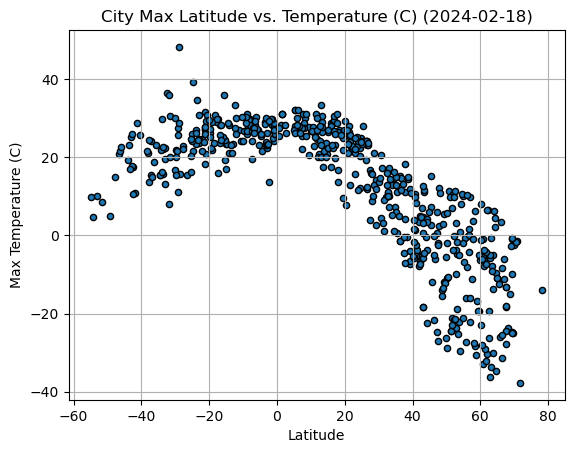

In [8]:
# Build scatter plot for latitude vs. temperature
lat_temp = city_data_df.plot(kind="scatter",x="Lat",y="Max Temp",grid=True,
                            xlabel="Latitude",
                            ylabel="Max Temperature (C)",
                            marker="o",
                            edgecolors="black")

# Incorporate the other graph properties
date_retrieved = city_data_df['Date'][0]
date_converted = pd.to_datetime(date_retrieved,unit='s').date()
plt.title(label=f"City Max Latitude vs. Temperature (C) ({date_converted})")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show(lat_temp)

#### Latitude Vs. Humidity

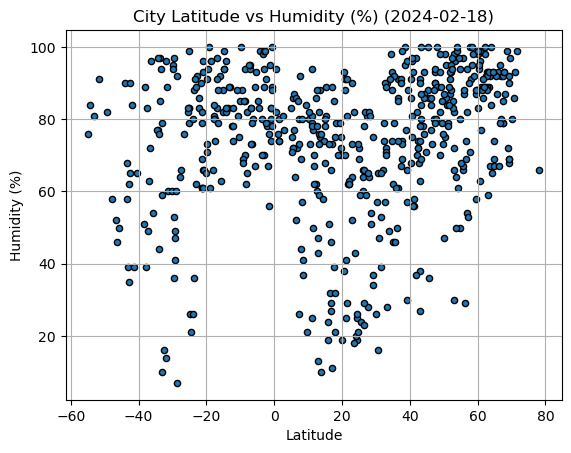

In [9]:
# Build the scatter plots for latitude vs. humidity
lat_humidity = city_data_df.plot(kind="scatter",x="Lat",y="Humidity",grid=True,
                                 xlabel="Latitude",
                                 ylabel="Humidity (%)",
                                 title=f"City Latitude vs Humidity (%) ({date_converted})",
                                 edgecolors="black",
                                )

# Incorporate the other graph properties
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

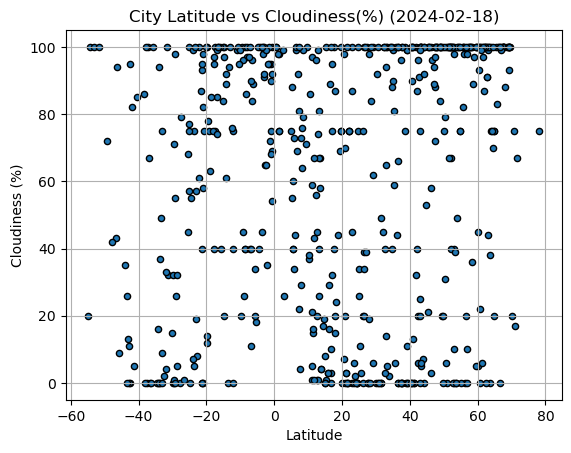

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloudiness = city_data_df.plot(kind="scatter",x="Lat",y="Cloudiness",grid=True,
                                  xlabel="Latitude",
                                  ylabel="Cloudiness (%)",
                                  title=f"City Latitude vs Cloudiness(%) ({date_converted})", 
                                  edgecolors="black")

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

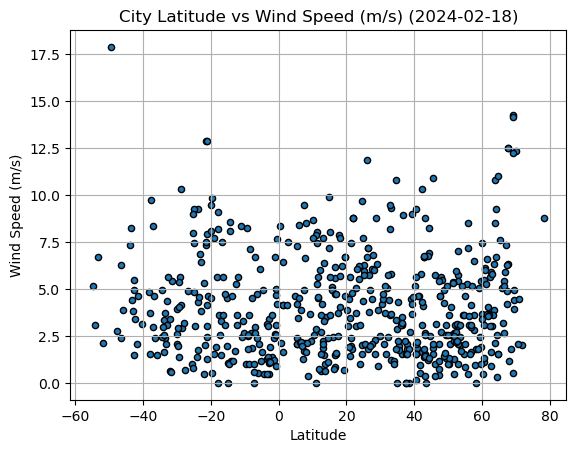

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat_windspeed = city_data_df.plot(kind="scatter",x="Lat",y="Wind Speed",grid=True,
                                  xlabel="Latitude",
                                  ylabel="Wind Speed (m/s)",
                                  title=f"City Latitude vs Wind Speed (m/s) ({date_converted})", 
                                  edgecolors="black")

# Incorporate the other graph properties
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x,y,x_label,y_label,title):
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    line=slope *x +intercept
    equation = 'y='+str(round(slope,2))+"x+" + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,line,color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    annotation_x = max(x-(x/4))
    annotation_y = min(y-(y/4))
    plt.annotate(equation,(annotation_x,annotation_y),fontsize=15,color="red")
    plt.show()
    print(f'The r-value is: {r_value}')

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bargarh,21.3333,83.6167,26.54,29,0,1.99,IN,1708230240
1,cabo san lucas,22.8909,-109.9124,20.98,64,0,3.02,MX,1708229916
2,vernon,50.2581,-119.2691,-2.06,75,79,1.03,CA,1708230241
3,kodiak,57.7900,-152.4072,3.73,100,100,3.60,US,1708230241
5,mangrol,21.1167,70.1167,25.33,41,3,3.47,IN,1708230242


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,margaret river,-33.9500,115.0667,29.89,44,94,1.64,AU,1708230242
6,chui,-33.6971,-53.4616,22.21,97,37,3.34,UY,1708230243
9,waitangi,-43.9535,-176.5597,19.34,90,35,7.36,NZ,1708230244
11,lorengau,-2.0226,147.2712,29.01,78,35,1.40,PG,1708230245
20,mariental,-24.6333,17.9667,21.70,21,55,3.02,NaN,1708230249


###  Temperature vs. Latitude Linear Regression Plot

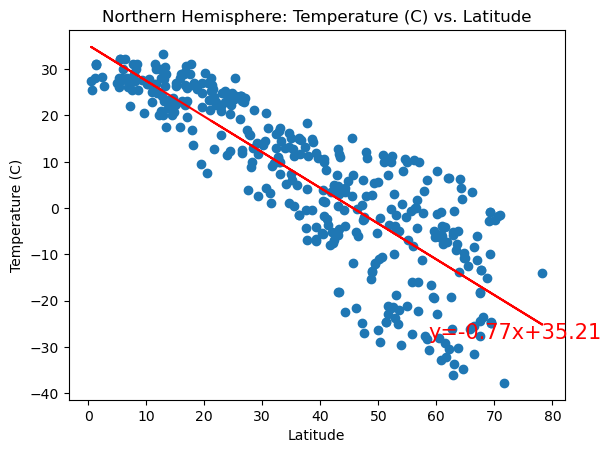

The r-value is: -0.8488143014684043


In [15]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],
                       northern_hemi_df['Max Temp'],
                       'Latitude',
                       'Temperature (C)',
                       'Northern Hemisphere: Temperature (C) vs. Latitude')

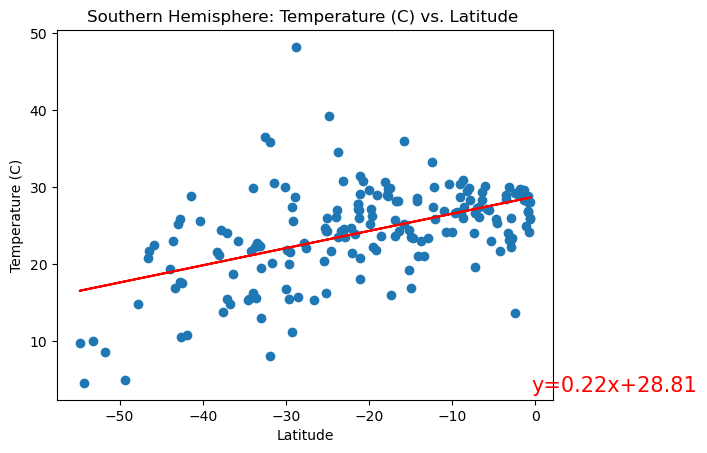

The r-value is: 0.496257961211741


In [16]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],
                       southern_hemi_df['Max Temp'],
                       'Latitude',
                       'Temperature (C)',
                       'Southern Hemisphere: Temperature (C) vs. Latitude ')

**Discussion about the linear relationship:** For the Northern Hemisphere, we have a negative r value, which indicates a negative correlation between temperature and latitude, as the latitude goes up (away from equator), the temperature drops (gets colder). With the Sourthern Hemisphere, this r-value indicates a positive correlation. As the latitude goes up (approach the equator), the temperature goes up(gets hotter). These two plots together indicate its warmer closer to the equator and coolder the further you get from it. 

### Humidity vs. Latitude Linear Regression Plot

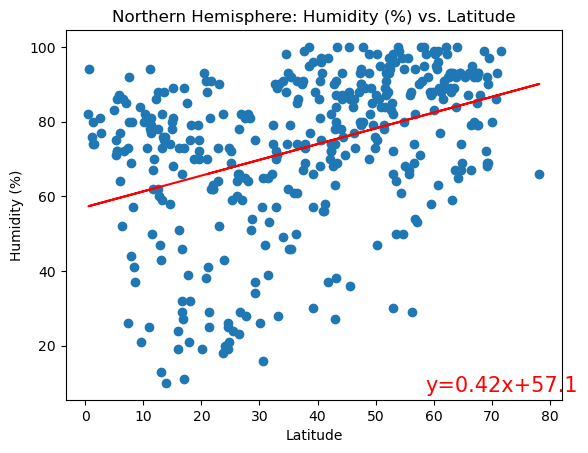

The r-value is: 0.39073890750100015


In [17]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],
                       northern_hemi_df['Humidity'],
                       'Latitude',
                       'Humidity (%)',
                       'Northern Hemisphere: Humidity (%) vs. Latitude')

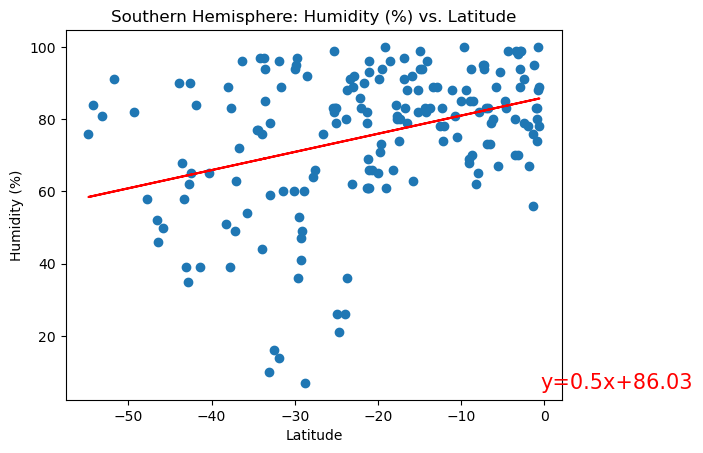

The r-value is: 0.3557163276476805


In [18]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],
                       southern_hemi_df['Humidity'],
                       'Latitude',
                       'Humidity (%)',
                       'Southern Hemisphere: Humidity (%) vs. Latitude')

**Discussion about the linear relationship:** For both the Northern and Southern Hemisphere we have slightly positive r-values. It seems to show as you move further north humidity increases in the Northern Hemisphere, and as you approach the equator in the Southern Hemisphere, humidity also increases. The data is widespread and the correlation isn't super high, so it would not be right to call it causation. 

### Cloudiness vs. Latitude Linear Regression Plot

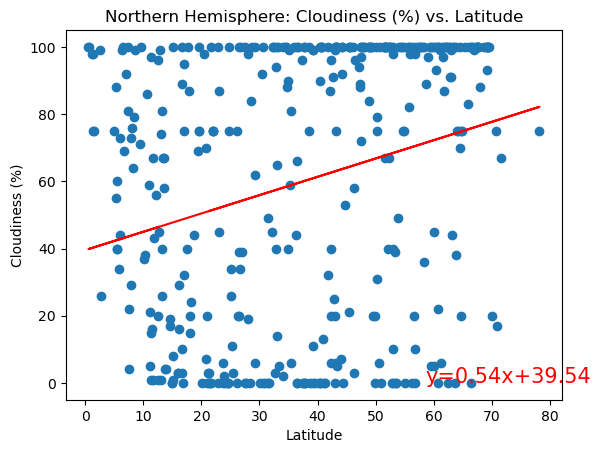

The r-value is: 0.26261505816576397


In [19]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],
                       northern_hemi_df['Cloudiness'],
                       'Latitude',
                       'Cloudiness (%)',
                       'Northern Hemisphere: Cloudiness (%) vs. Latitude')

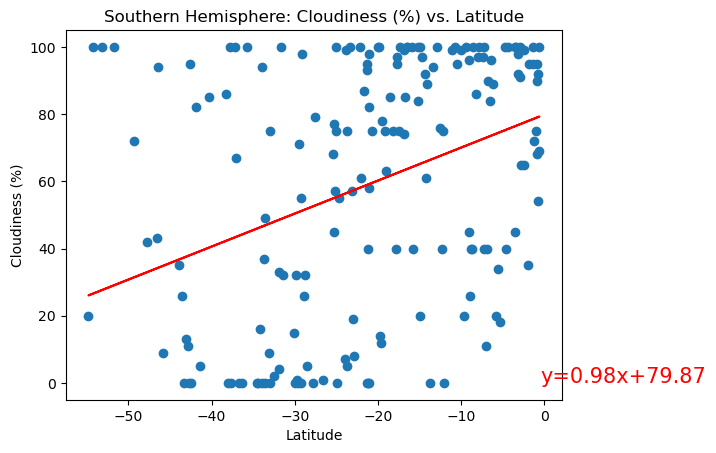

The r-value is: 0.35871577333864635


In [20]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],
                       southern_hemi_df['Cloudiness'],
                       'Latitude',
                       'Cloudiness (%)',
                       'Southern Hemisphere: Cloudiness (%) vs. Latitude')

**Discussion about the linear relationship:** With these two plots we only see slightly positive r values. This indicates a small positive correlation between latitude and cloudiness. However the variablity of values is so wide that it would not be right to neccecearily call it a strong correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

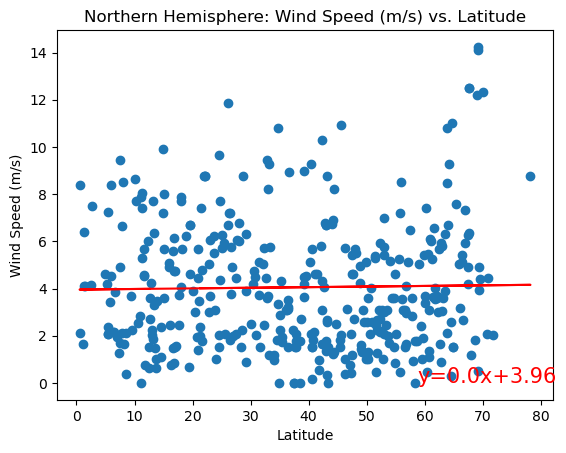

The r-value is: 0.01846518843324776


In [21]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],
                       northern_hemi_df['Wind Speed'],
                       'Latitude',
                       'Wind Speed (m/s)',
                       'Northern Hemisphere: Wind Speed (m/s) vs. Latitude')

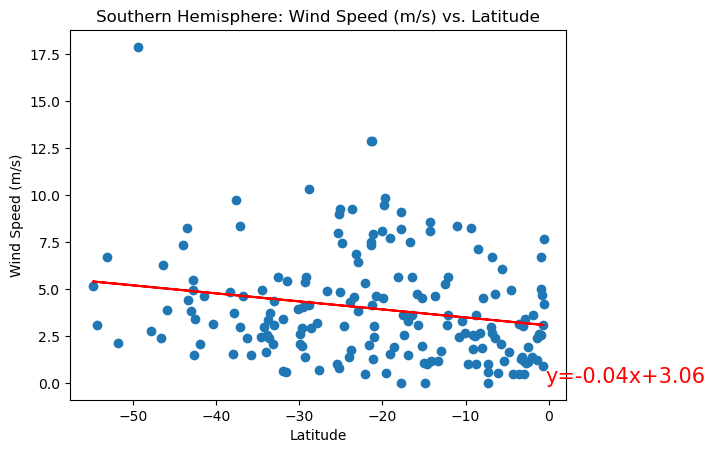

The r-value is: -0.20670808402896423


In [22]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],
                       southern_hemi_df['Wind Speed'],
                       'Latitude',
                       'Wind Speed (m/s)',
                       'Southern Hemisphere: Wind Speed (m/s) vs. Latitude')

**Discussion about the linear relationship:** Again with these plots we see a close to zero and a slightly negative r value. There is no strong positive or negative correlation between windspeed and latitude.